In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' )

# begin by creating a dataframe of all the records in the excel sheet
df = pd.read_excel(r'C:\Users\Brock\Documents\My Tableau Repository\Datasources\Sample - Superstore.xls', parse_dates=["Order Date"])
df.set_index("Row ID", inplace=True)
df["Order Date"] = pd.to_datetime(df["Order Date"], format='%Y-%m-%d', errors="coerce")
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


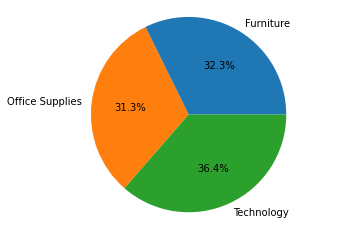

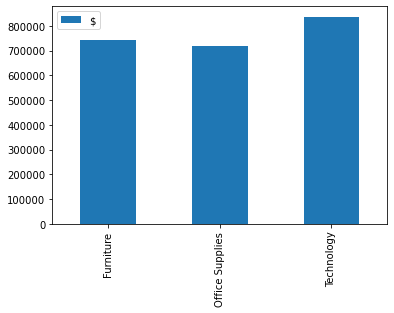

In [11]:
# initialize a dictionary of categories and sales
salesByCat = {'Furniture': 0, 'Office Supplies': 0, 'Technology': 0}

# iterate through the dataframe and create the dictionaries
for each in df.iterrows():
    
    # total the sales for each category
    salesByCat[each[1].Category] += round(each[1].Sales)
    
# initialize a dictionary for states and sales
salesByState = df.groupby(["State", "Sales"]).sum().reset_index().groupby("State").mean()
        
# make a new dataframe from the sales by category data
sbc = pd.DataFrame.from_dict(salesByCat, orient='index')

# create a pie chart of categories with sales as a percentage
plt.pie(salesByCat.values(), labels=salesByCat.keys(), autopct='%1.1f%%')
plt.axis('equal')
plt.show()

# create a bar chart for total sales
sbc.plot.bar()
plt.legend("$")

In [3]:
# create a new dataframe with the averages for each state
salesByState = df.groupby(["State"]).sum().reset_index().groupby("State").mean()

# clean up:
# format currency
salesByState[["Sales", "Profit"]] = salesByState[["Sales", "Profit"]].apply(lambda series: series.apply(lambda x: locale.currency(x, grouping = True)))

# drop unwanted columns
salesByState = salesByState.drop(["Postal Code", "Quantity", "Discount"], axis=1)

salesByState

,Sales,Profit
State,,
Alabama,"$19,510.64","$5,786.83"
Arizona,"$35,282.00","($3,427.92)"
Arkansas,"$11,678.13","$4,008.69"
California,"$457,687.63","$76,381.39"
Colorado,"$32,108.12","($6,527.86)"
Connecticut,"$13,384.36","$3,511.49"
Delaware,"$27,451.07","$9,977.37"
District of Columbia,"$2,865.02","$1,059.59"
Florida,"$89,473.71","($3,399.30)"


<AxesSubplot:xlabel='Month'>

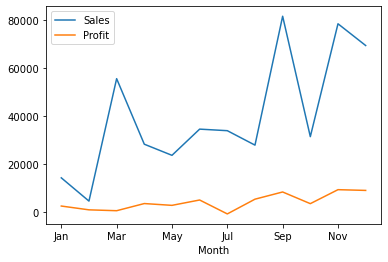

In [13]:
# import ipywidgets as widgets
# from ipywidgets import interactive
 
# items = [2014,2015,2016,2017,2018]
 
# def view(x=''):

#     return sbd.loc[(sbd["Order Date"].dt.year == x)]

# w = widgets.Select(options=items)
# interactive(view, x=w)



# create a new dataframe grouped by date
sbd = df.groupby(pd.Grouper(key = "Order Date", freq = "M")).sum().reset_index()

# clean up:
# drop unwanted columns
sbd = sbd.drop(["Postal Code", "Quantity", "Discount"], axis=1)

# select year
sbd = sbd.loc[(sbd["Order Date"].dt.year == 2014)]

# format date
sbd.rename(columns = {"Order Date": "Month"}, inplace = True)
sbd["Month"] = sbd["Month"].dt.strftime('%b')
sbd = sbd.set_index("Month")

sbd.plot()